### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Rutas de los archivos csv
paths = ["base-de-datos-challenge1-latam/tienda_1.csv", "base-de-datos-challenge1-latam/tienda_2.csv", "base-de-datos-challenge1-latam/tienda_3.csv", "base-de-datos-challenge1-latam/tienda_4.csv"] 

# Nombres de las tiendas
nombres_tienda = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Cargamos los csv y añadimos una columna con el nombre de la tienda
dataframes = []
for path, nombre in zip(paths, nombres_tienda):
    df_tienda = pd.read_csv(path)
    df_tienda['Tienda'] = nombre
    dataframes.append(df_tienda)

# Unificamos los DataFrames
df = pd.concat(dataframes, ignore_index=True)

# Mostramos las primeras filas del DataFrame unificado
df.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [3]:
# Mostramos información del DataFrame unificado
print(df.info())

# Mostramos las primeras filas
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB
None


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [4]:
# Convertimos la fecha y el precio a los tipos correctos para prevenir errores
df['fecha'] = pd.to_datetime(df['Fecha de Compra'], format='%d/%m/%Y')
df['precio'] = pd.to_numeric(df['Precio'], errors='coerce')

# Calculamos la facturacion total
facturacion_total = df['precio'].sum()
print(f"La facturacion total de todas las tiendas es: {facturacion_total}")

# Verificamos el tipo de datos nuevamente
df.info()

La facturacion total de todas las tiendas es: 4403619200.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Producto                9435 non-null   object        
 1   Categoría del Producto  9435 non-null   object        
 2   Precio                  9435 non-null   float64       
 3   Costo de envío          9435 non-null   float64       
 4   Fecha de Compra         9435 non-null   object        
 5   Vendedor                9435 non-null   object        
 6   Lugar de Compra         9435 non-null   object        
 7   Calificación            9435 non-null   int64         
 8   Método de pago          9435 non-null   object        
 9   Cantidad de cuotas      9435 non-null   int64         
 10  lat                     9435 non-null   float64       
 11  lon                     9435 non-null   float64  

# 2. Ventas por categoría

In [5]:
# Calculamos las ventas por categoria
ventas_por_categoria = df.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
ventas_por_categoria_millones = (ventas_por_categoria / 1_000_000).round(2)

print("Ventas por categoría en millones:")
print(ventas_por_categoria_millones)

Ventas por categoría en millones:
Categoría del Producto
Electrónicos               1660.58
Electrodomésticos          1324.75
Muebles                     757.66
Instrumentos musicales      348.77
Deportes y diversión        142.98
Juguetes                     73.60
Artículos para el hogar      57.58
Libros                       37.70
Name: Precio, dtype: float64


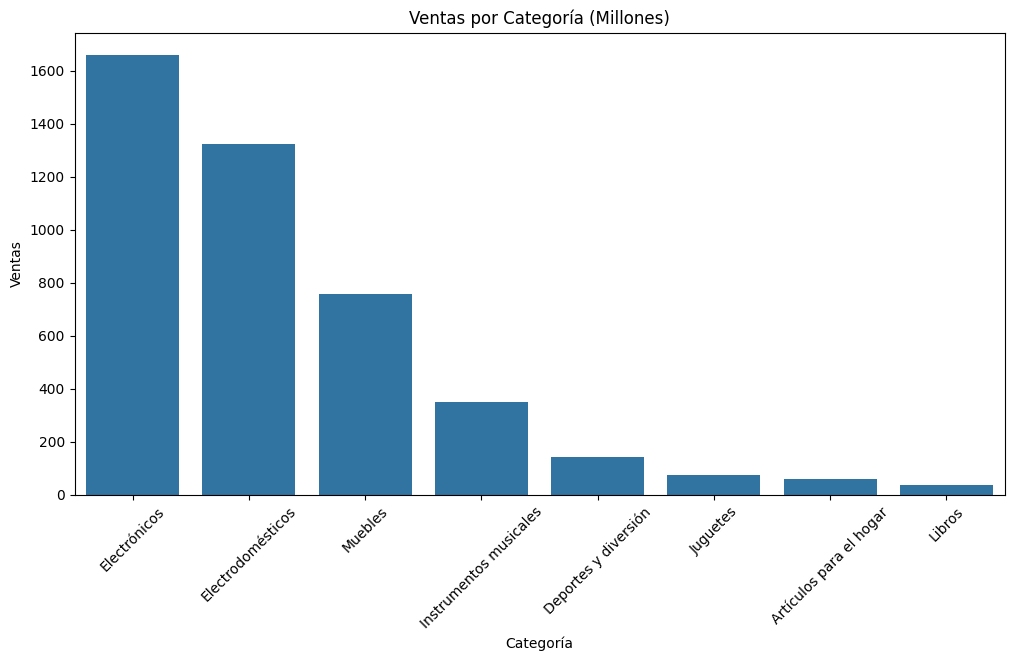

In [6]:
# Visualizamos las ventas por categoría
plt.figure(figsize=(12, 6))
sns.barplot(x=ventas_por_categoria_millones.index, y=ventas_por_categoria_millones.values)
plt.title("Ventas por Categoría (Millones)")
plt.xlabel("Categoría")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.show()

# 3. Calificación promedio de la tienda


In [7]:
# Agrupamos y calculamos la calilficacion promedio por tienda
calificacion_promedio_tienda = df.groupby('Tienda')['Calificación'].mean().sort_values(ascending=False)

print("Calificación promedio por tienda:")
print(calificacion_promedio_tienda)

Calificación promedio por tienda:
Tienda
Tienda 3    4.048326
Tienda 2    4.037304
Tienda 4    3.995759
Tienda 1    3.976685
Name: Calificación, dtype: float64


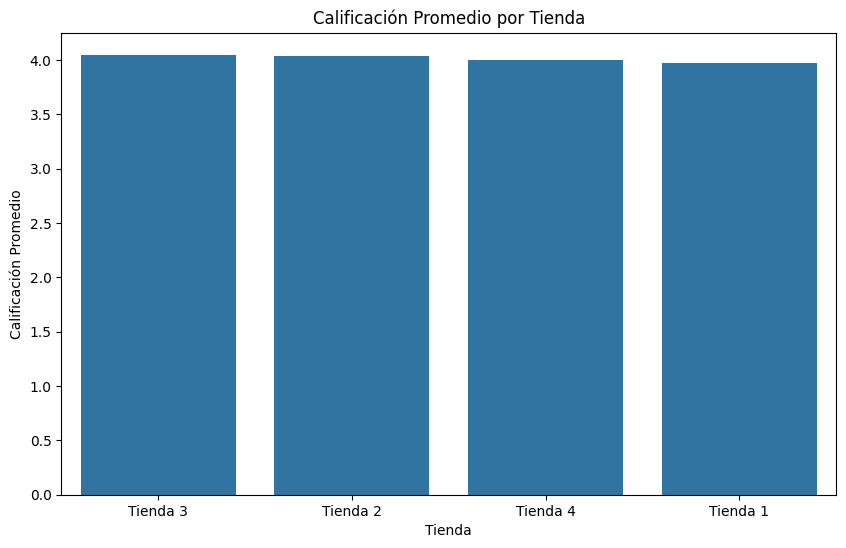

In [8]:
# Visualizamos las calificaciones promedio por tienda
plt.figure(figsize=(10, 6))
sns.barplot(x=calificacion_promedio_tienda.index, y=calificacion_promedio_tienda.values)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.show()

# 4. Productos más y menos vendidos

In [11]:
# Contamos la frecuencia de cada producto
frecuencia_productos = df['Producto'].value_counts()

top_10_mas_vendidos = frecuencia_productos.head(10)
top_10_menos_vendidos = frecuencia_productos.tail(10)

# Mostramos los productos más vendidos
print("Productos más vendidos:")
print(top_10_mas_vendidos)

# Mostramos los productos menos vendidos
print("Productos menos vendidos:")
print(top_10_menos_vendidos)

Productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64
Productos menos vendidos:
Producto
Olla de presión                172
Smartwatch                     172
Set de vasos                   169
Sillón                         168
Asistente virtual              167
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


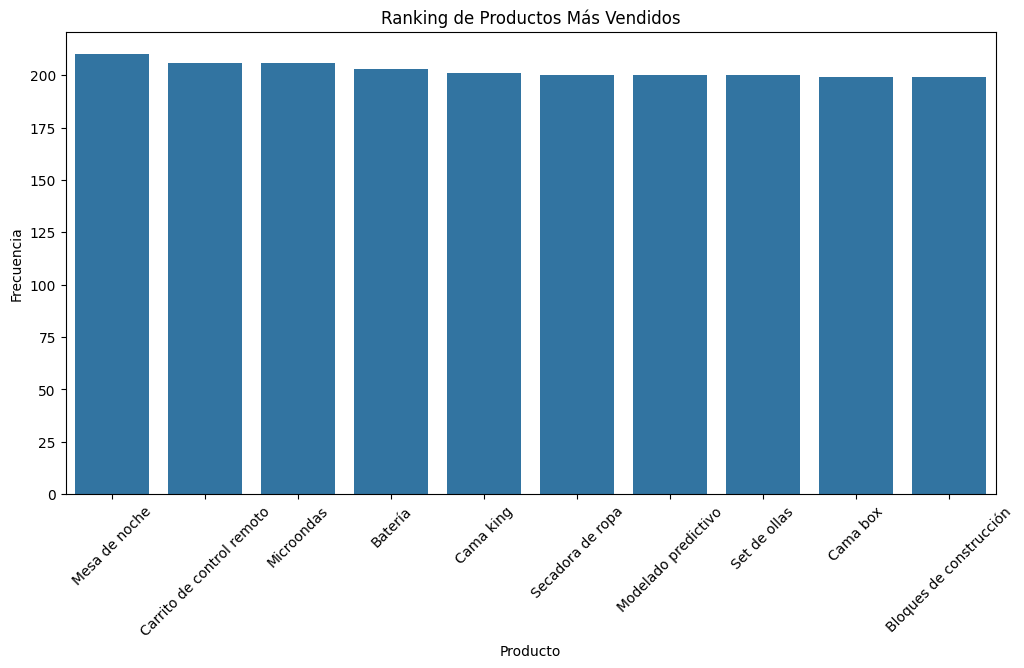

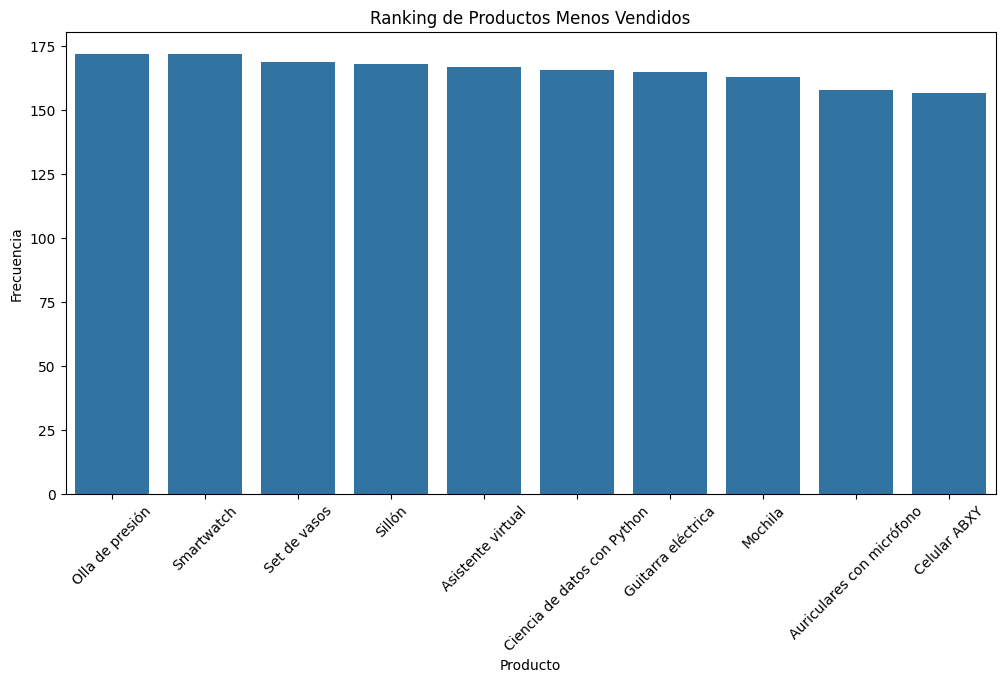

In [13]:
# Visualizamos el ranking de productos más vendidos
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_mas_vendidos.index, y=top_10_mas_vendidos.values)
plt.title('Ranking de Productos Más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# Visualizamos el ranking de productos menos vendidos
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_menos_vendidos.index, y=top_10_menos_vendidos.values)
plt.title('Ranking de Productos Menos Vendidos')
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

# 5. Envío promedio por tienda

In [15]:
# Convertimos la columna costo de envío a tipo numérico para prevenir errores
df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

# Calculamos el costo de envío promedio por tienda
costo_envio_promedio = df.groupby('Tienda')['Costo de envío'].mean().sort_values(ascending=False)

print("Costo de envío promedio por tienda:")
print(costo_envio_promedio)

Costo de envío promedio por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo de envío, dtype: float64


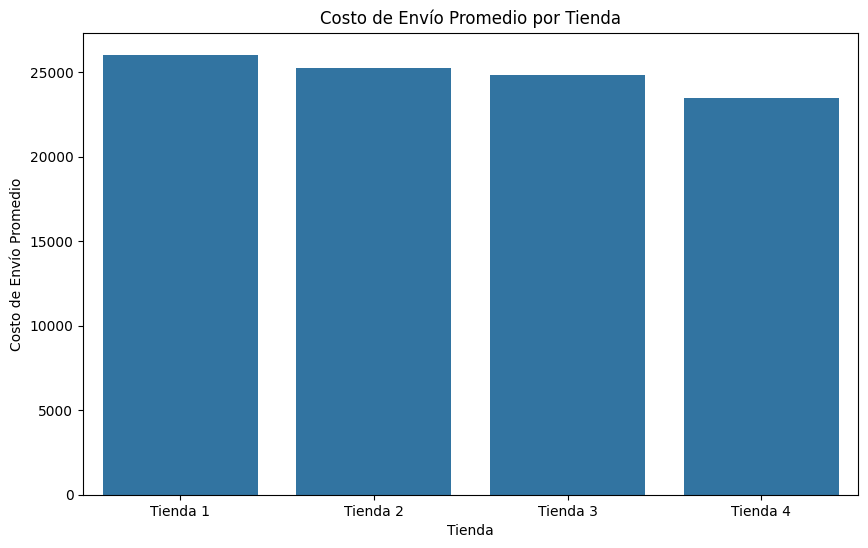

In [16]:
# Visualizamos el costo de envio promedio por tienda
plt.figure(figsize=(10, 6))
sns.barplot(x=costo_envio_promedio.index, y=costo_envio_promedio.values)
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.show()